In [45]:
from collections import OrderedDict
import torch
from torch import nn
from torch import optim

from torchvision import datasets, transforms

import torch.nn.functional as F

import matplotlib.pyplot as plt
import numpy as np

In [46]:
def view_classify(img, ps):

    ps = ps.data.numpy().squeeze()

    fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
    ax1.imshow(img.resize_(1, 28, 28).numpy().squeeze())
    ax1.axis('off')
    ax2.barh(np.arange(10), ps)
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(10))
    ax2.set_yticklabels(np.arange(10))
    ax2.set_title('Class Probability')
    ax2.set_xlim(0, 1.1)

In [57]:
# Define a transform to normalize the data (Preprocessing)
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5), (0.5)) ])

# Download and load the training data
trainset    = datasets.MNIST('MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=16, shuffle=True)

# Download and load the test data
testset    = datasets.MNIST('MNIST_data/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=16, shuffle=True)

In [75]:
trainset.data.shape

torch.Size([60000, 28, 28])

In [80]:
dataiter = iter(trainloader)
images, labels = dataiter.next()
images[1]

tensor([[[-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000],
         [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000],
         [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000],
         [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1

In [58]:
# Hyperparameters for our network
input_size   = 784
hidden_sizes = [128, 64]
output_size  = 10

# Build a feed-forward network
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Sequential(
            nn.Linear(input_size, hidden_sizes[0]),
            nn.ReLU())  # on device cpu
        self.fc2 = nn.Sequential(
            nn.Linear(hidden_sizes[0], hidden_sizes[1]),
            nn.ReLU())  # on device "cuda:1"
        self.fc3 = nn.Sequential(
            nn.Linear(hidden_sizes[1], output_size))  # on device "cuda:0"
        
    def forward(self, x):
        x = self.fc1(x)
        x = self.fc2(x)
        return self.fc3(x)

In [59]:
model = Net()

In [60]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.003)

In [61]:
epochs = 10
print_every = 40

for e in range(epochs):
    running_loss = 0
    print(f"Epoch: {e+1}/{epochs}")

    for i, (images, labels) in enumerate(iter(trainloader)):

        # Flatten MNIST images into a 784 long vector
        images.resize_(images.size()[0], 784)
        
        optimizer.zero_grad()
        
        output = model.forward(images)   # 1) Forward pass
        loss = criterion(output, labels) # 2) Compute loss
        loss.backward()                  # 3) Backward pass
        optimizer.step()                 # 4) Update model
        
        running_loss += loss.item()
        
        if i % print_every == 0:
            print(f"\tIteration: {i}\t Loss: {running_loss/print_every:.4f}")
            running_loss = 0

torch.save(model, "output/model.pt")

Epoch: 1/10
	Iteration: 0	 Loss: 0.0572
	Iteration: 40	 Loss: 2.2985
	Iteration: 80	 Loss: 2.2821
	Iteration: 120	 Loss: 2.2631
	Iteration: 160	 Loss: 2.2406
	Iteration: 200	 Loss: 2.2240
	Iteration: 240	 Loss: 2.1959
	Iteration: 280	 Loss: 2.1707
	Iteration: 320	 Loss: 2.1548
	Iteration: 360	 Loss: 2.1113
	Iteration: 400	 Loss: 2.0876
	Iteration: 440	 Loss: 2.0476
	Iteration: 480	 Loss: 2.0153
	Iteration: 520	 Loss: 1.9643
	Iteration: 560	 Loss: 1.9293
	Iteration: 600	 Loss: 1.8584
	Iteration: 640	 Loss: 1.7989
	Iteration: 680	 Loss: 1.7462
	Iteration: 720	 Loss: 1.6813
	Iteration: 760	 Loss: 1.6466
	Iteration: 800	 Loss: 1.5733
	Iteration: 840	 Loss: 1.5125
	Iteration: 880	 Loss: 1.4291
	Iteration: 920	 Loss: 1.4083
	Iteration: 960	 Loss: 1.3367
	Iteration: 1000	 Loss: 1.2363
	Iteration: 1040	 Loss: 1.2289
	Iteration: 1080	 Loss: 1.1797
	Iteration: 1120	 Loss: 1.1060
	Iteration: 1160	 Loss: 1.0946
	Iteration: 1200	 Loss: 1.0427
	Iteration: 1240	 Loss: 0.9539
	Iteration: 1280	 Loss: 0

9


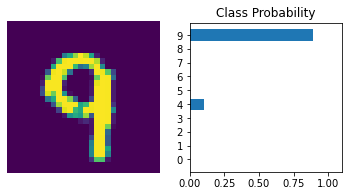

In [53]:
images, labels = next(iter(testloader))

img = images[0].view(1, 784)
# Turn off gradients to speed up this part
with torch.no_grad():
    logits = model.forward(img)

# Output of the network are logits, need to take softmax for probabilities
ps = F.softmax(logits, dim=1)

view_classify(img.view(1, 28, 28), ps)

print(ps.argmax().item())

In [10]:
result = ps.data.numpy().squeeze()
result

array([2.5902222e-07, 9.9267817e-01, 2.3743762e-03, 1.4324361e-03,
       1.1971556e-05, 1.4845103e-03, 3.2142439e-04, 2.3850222e-04,
       1.3826763e-03, 7.5679884e-05], dtype=float32)

In [11]:
result.argmax()

1

In [12]:
import skimage
print(skimage.__version__)

0.18.3


In [62]:
model = torch.load('output/model.pt')
model.eval()

total = 0
correct = 0
for i, (images, labels) in enumerate(iter(testloader)):
    images.resize_(images.size()[0], 784)
    print(labels)
	#print(labels)
    preds = model.forward(images)
    _, prediction = torch.max(preds, dim = 1)
    count = sum(prediction == labels).item()
    print(count)
		#if random.random() < 0.80:
		#	print("PREDICTIONS : ", prediction)
		#	print("LABELS : ", labels)
		#break
    total += labels.size(0)
    correct += count
accuracy = correct/total
print(accuracy)

tensor([4, 0, 5, 7, 3, 9, 1, 1, 4, 7, 6, 7, 9, 3, 6, 5])
15
tensor([6, 7, 1, 6, 8, 2, 6, 4, 8, 8, 8, 5, 4, 0, 7, 1])
15
tensor([9, 2, 7, 9, 1, 5, 1, 6, 6, 1, 0, 5, 7, 7, 1, 6])
16
tensor([5, 4, 1, 2, 2, 1, 6, 9, 8, 0, 6, 7, 5, 5, 9, 8])
14
tensor([8, 3, 4, 6, 2, 1, 6, 7, 8, 7, 8, 1, 9, 7, 3, 2])
16
tensor([2, 3, 2, 3, 8, 6, 4, 0, 3, 1, 7, 3, 5, 4, 7, 0])
16
tensor([1, 5, 5, 7, 2, 9, 7, 8, 4, 0, 1, 1, 0, 5, 9, 1])
15
tensor([0, 1, 5, 6, 8, 1, 5, 0, 0, 1, 1, 1, 9, 2, 0, 7])
16
tensor([9, 0, 3, 1, 8, 9, 7, 1, 1, 6, 1, 1, 4, 0, 8, 1])
14
tensor([2, 0, 3, 5, 1, 7, 0, 1, 0, 2, 9, 8, 4, 2, 4, 5])
16
tensor([3, 0, 8, 3, 9, 6, 0, 5, 0, 9, 7, 9, 3, 1, 4, 0])
16
tensor([8, 7, 0, 9, 6, 4, 6, 4, 3, 5, 9, 4, 9, 7, 4, 3])
15
tensor([9, 3, 8, 5, 8, 5, 2, 5, 2, 6, 7, 1, 1, 1, 8, 7])
16
tensor([6, 0, 1, 3, 7, 4, 4, 6, 6, 7, 4, 3, 3, 1, 1, 8])
15
tensor([6, 2, 5, 1, 4, 1, 0, 1, 5, 1, 8, 1, 6, 1, 1, 2])
16
tensor([9, 2, 9, 7, 5, 8, 0, 9, 4, 9, 6, 8, 7, 6, 6, 3])
15
tensor([5, 8, 3, 9, 8, 3, 7, 0, 9, 4, 1,